## Predict fuel efficiency Using Linear regression Tensorflow

In [21]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

2.0.0


In [22]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


In [23]:
dataset_path

'/Users/mayur/.keras/datasets/auto-mpg.data'

In [24]:

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(dataset_path, sep=" ", names = column_names,skipinitialspace=True, na_values="?",comment='\t')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [25]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [26]:
df=df.dropna()

In [27]:
df.count()


MPG             392
Cylinders       392
Displacement    392
Horsepower      392
Weight          392
Acceleration    392
Model Year      392
Origin          392
dtype: int64

In [28]:
df.size
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [29]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [30]:
df['Origin'] = df['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [31]:
train_df=df.sample(frac=0.8,random_state=0)
test_df= df.drop(train_df.index)
train_df.count()
test_df.count()

MPG             78
Cylinders       78
Displacement    78
Horsepower      78
Weight          78
Acceleration    78
Model Year      78
Europe          78
Japan           78
USA             78
dtype: int64

In [32]:
train_labels = train_df.pop('MPG')
test_labels = test_df.pop('MPG')

In [33]:
test_labels.values

array([15. , 10. ,  9. , 25. , 19. , 14. , 14. , 13. , 18. , 35. , 25. ,
       19. , 13. , 28. , 13. , 14. , 15. , 13. , 18. , 12. , 16. , 24. ,
       19. , 24. , 31. , 26. , 16. , 24. , 18. , 20. , 29. , 18. , 19. ,
       22. , 26. , 17.5, 22.5, 29. , 29. , 20. , 32. , 28. , 13. , 43.1,
       36.1, 32.8, 20.5, 20.8, 18.1, 27.5, 30.9, 17. , 29.5, 16.5, 15.5,
       18.5, 31.9, 34.1, 19.1, 27.9, 44.3, 32.4, 26.6, 23.5, 30. , 39.1,
       34.1, 34.4, 33. , 28.1, 22.4, 26.6, 28. , 34. , 36. , 34. , 32. ,
       28. ])

In [34]:
from sklearn import preprocessing

def normalize_data(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return  pd.DataFrame(x_scaled)

norm_train = normalize_data(train_df)
norm_test = normalize_data(test_df)

In [35]:
norm_test.tail()

,0,1,2,3,4,5,6,7,8
73,0.2,0.127273,0.219780,0.249601,0.693431,1.0,0.0,0.0,1.0
74,0.2,0.106061,0.142857,0.117140,0.496350,1.0,1.0,0.0,0.0
75,0.2,0.115152,0.120879,0.201724,0.613139,1.0,0.0,1.0,0.0
76,0.2,0.063636,0.104396,0.112352,0.525547,1.0,0.0,1.0,0.0
77,0.2,0.151515,0.170330,0.323013,0.737226,1.0,0.0,0.0,1.0


In [36]:
len(norm_train.keys())

9

In [37]:
norm_train.keys() #this gives the number of columns

RangeIndex(start=0, stop=9, step=1)

In [38]:
norm_train.count()

0    314
1    314
2    314
3    314
4    314
5    314
6    314
7    314
8    314
dtype: int64

In [39]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(norm_train.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [40]:
model = build_model()

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [42]:
example_batch = norm_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.02832506],
       [ 0.02956396],
       [ 0.21026626],
       [ 0.00149196],
       [-0.06846362],
       [ 0.1394696 ],
       [-0.08832422],
       [-0.03532612],
       [ 0.14093153],
       [-0.03469521]], dtype=float32)

In [43]:
# history = model.fit(norm_train.shuffle(10000).batch(512),
#                     epochs=20,
#                     validation_data=norm_test.batch(512),
#                     verbose=1)


num_epochs = 500
history = model.fit(norm_train, train_labels, epochs=num_epochs, validation_data=(norm_test, test_labels), verbose=2)

Epoch 341/500
314/314 - 0s - loss: 6.2375 - mae: 1.7553 - mse: 6.2375 - val_loss: 5.7870 - val_mae: 1.8801 - val_mse: 5.7870
Epoch 342/500
314/314 - 0s - loss: 6.1392 - mae: 1.7700 - mse: 6.1392 - val_loss: 5.9563 - val_mae: 1.8327 - val_mse: 5.9563
Epoch 343/500
314/314 - 0s - loss: 6.0348 - mae: 1.7397 - mse: 6.0348 - val_loss: 5.6243 - val_mae: 1.8387 - val_mse: 5.6243
Epoch 344/500
314/314 - 0s - loss: 6.0524 - mae: 1.7415 - mse: 6.0524 - val_loss: 6.3614 - val_mae: 1.8871 - val_mse: 6.3614
Epoch 345/500
314/314 - 0s - loss: 6.2177 - mae: 1.7585 - mse: 6.2177 - val_loss: 6.0253 - val_mae: 1.8574 - val_mse: 6.0253
Epoch 346/500
314/314 - 0s - loss: 6.2782 - mae: 1.7744 - mse: 6.2782 - val_loss: 5.6860 - val_mae: 1.8578 - val_mse: 5.6860
Epoch 347/500
314/314 - 0s - loss: 6.0666 - mae: 1.7201 - mse: 6.0666 - val_loss: 5.9464 - val_mae: 1.8695 - val_mse: 5.9464
Epoch 348/500
314/314 - 0s - loss: 6.2462 - mae: 1.7686 - mse: 6.2462 - val_loss: 6.5716 - val_mae: 1.9414 - val_mse: 6.5716


In [44]:
print(history.history)

8828927064553, 44.33584359975961, 35.03423940218412, 27.2273006439209, 22.646366950793144, 19.404381849826912, 17.37619238633376, 16.178238159570938, 14.77073503151918, 13.671907009222569, 13.057884167402218, 13.096755810272999, 12.07060963068253, 11.301906854678423, 10.779567278348482, 10.450178831051558, 10.032632925571539, 9.660908258878267, 9.367527729425674, 9.166174289507744, 8.975889034760304, 8.55145099835518, 9.095429493830753, 8.14126704289363, 8.768200580890362, 7.719181219736735, 7.571655334570469, 7.398165348248604, 7.216791752057198, 7.433413407741448, 7.112991675352439, 7.045945803324382, 6.814651807149251, 7.230872991757515, 6.7130782176286745, 6.782558820186517, 6.5867707301408815, 6.566653642898951, 6.639762633886093, 6.518434634575477, 6.360037021147899, 6.588894764582316, 6.329755208431146, 6.464678238599729, 6.8371633138412085, 6.085077175727258, 6.474049818821443, 6.397363516000601, 6.16950474641262, 6.169006274296687, 6.334241671439929, 6.321012448041867, 6.07025

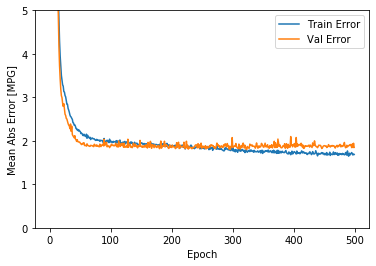

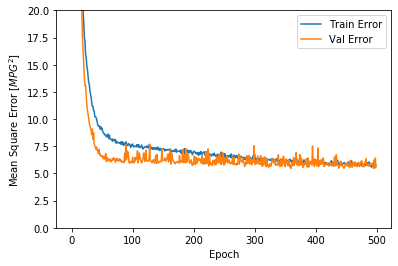

In [47]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)